# Topics in Market Microstructure Models - Homework 5 <font color=blue> Solutions </font>

Assigned: July 26, 2016.
Due: August 2, 2016 by 1pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Xinquan Chen (cxq_ccer@163.com) and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TA Xinquan Chen.

## Price manipulation

### 1. (10 points)

Consider the price process

$$
S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s
$$

where ${\dot x}_s$ is the rate of trading in dollars at time $s < t$, $f(\dot{x}_s)$ represents the impact of trading at time $s$ and $G(t-s)$ is a decay factor.

(a) With the choices

$$
f(v)=\sqrt{v},\quad G(\tau)=\frac{1}{1+\tau},
$$
    
repeat the computations in Lecture 5 to derive an expression for the expected cost of accumulating shares at the rate $v_1$ and liquidating them at the rate $v_2$.

(b) Verify that with $T=1$, $v_1=1/4$, $v_2=1$, the expected cost of this round-trip strategy is negative, thus demonstrating that price manipulation is possible. 


### <font color=blue> Solution </font>

Consider a strategy where shares are accumulated at the (positive) constant
rate $v_1$ and then liquidated again at the (positive) constant rate $v_2$.
The cost of this strategy is
given by $C_{11}+C_{22}-C_{12}$ with
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\int_0^{\theta\,T}\,dt\,\int_0^t\,G(t-s)\,ds \nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\int_{\theta\,T}^T\,dt\,\int_{\theta\,T}^t\,G(t-s)\,ds\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\int_{\theta\,T}^T\,dt\,\int_0^{\theta\,T}\,G(t-s)\,ds
\end{eqnarray*}
where $\theta$ is such that $v_1\,\theta\,T-v_2\,(T-\theta\,T)=0$ so
$$
\theta= \frac{v_2}{v_1+v_2}.
$$
Then, performing the integrations explicitly, we find
\begin{eqnarray*}
C_{11}&=&v_1^{3/2}\,\int_0^{\theta\,T}\,dt\,\int_0^t\,\frac{ds}{1+s}=v_1^{3/2}[(1+ \theta\,T) \log (1+\theta\, T)-\theta\,T]\\
C_{22}&=&v_2^{3/2}\,\int_{\theta\,T}^T\,dt\,\int_{\theta\,T}^t\,\frac{ds}{1+s}=v_2^{3/2}[ (1+(1-\theta)\,T) \log (1+(1-\theta)\,T)- (1-\theta)\,T]\\
C_{12}&=&v_2\,\sqrt{v_1}\,\int_{\theta\,T}^T\,dt\,\int_0^{\theta\,T}\,\frac{ds}{1+s}\\
&=&v_2\,\sqrt{v_1}[(1+T) \log (1+T)-(1+ (1-\theta)\,T) \log (1+ (1-\theta)\,T)-(1+\theta\,T)\log (1+\theta\,T)]
\end{eqnarray*}

With $T=1$, $v_1=1/4$, The expected cost of trading is then given by

$$
C=C_{11}+C_{22}-C_{12}=-\frac{3}{10}+\frac{9}{5} \log \left(\frac{6}{5}\right)+\frac{9}{8} \log \left(\frac{9}{5}\right)-\log (2) \approx - 0.0037 < 0.
$$

## The Obizhaeva-Wang model

### 2. (8 points)

In the Obizhaeva Wang (OW) model, the price follows

$$
S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s
$$

(a) Derive an expression for the expected price path corresponding to a VWAP execution.

(b) With the duration $T$ of the meta order set to 1, plot the expected price path from time $t=0$ to time $t=2$ for $\rho=0.5,1,$ and $2$.

(c) What is the expected average cost per share $\bar S_T$ of a VWAP order in the OW model?

### <font color=blue> Solution </font>

(a) The expected price path $\tilde S_t $ is given for $t \leq T$ by

$$
\tilde S_t=S_0+\eta\,\int_0^t\,v\,e^{-\rho\,(t-s)}\,ds = S_0+\eta\,\frac{X}{T}\,\frac{1-e^{-\rho\,t}}{\rho}
$$

and for $t>T$ by

$$
\tilde S_t=S_0+\eta\,\int_0^T\,v\,e^{-\rho\,(t-s)}\,ds = S_0+\eta\,\frac{X}{T}\,e^{-\rho\,(t-T)}\,\frac{1-e^{-\rho\,T}}{\rho}
$$

(b)

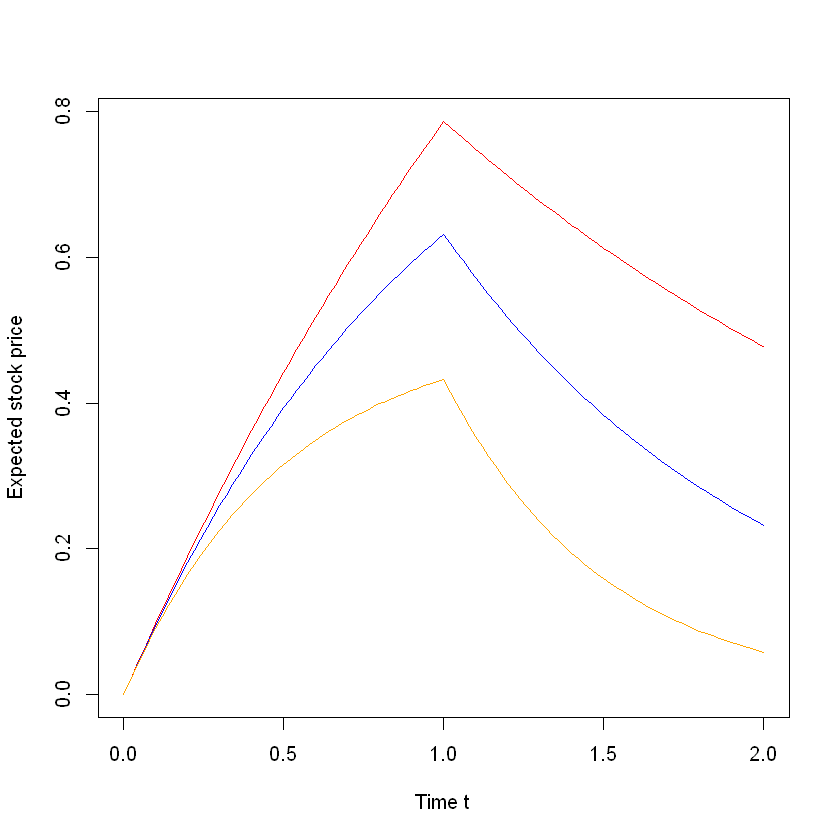

In [1]:
# The normalized expected price with T=1 is given by
sT <- function(rho,t) {(1-exp(-rho*t))/rho + (t>1)*(exp(-rho*(t-1))-1)/rho}
curve(sT(.5,x), from=0, to=2, col="red", ylab="Expected stock price", xlab="Time t") 
curve(sT(1,x), from=0, to=2, col="blue", add=T)
curve(sT(2,x), from=0, to=2, col="orange", add=T)

(c) The average cost $\bar S_T$ is given by

$$
\bar S_T=\frac{1}{T}\,\int_0^T\,\tilde S_t\,dt=S_0+\eta\,\frac{X}{T}\,\frac{1}{\rho\,T}\,\left\{T-\frac{1-e^{-\rho\,T}}{\rho}\right\}.
$$